In [1]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(grid)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
results = read.csv("eval-results-ml100k-sweep.csv")

In [4]:
head(results)

DataSet,Partition,Algorithm,FeatureCount,Succeeded,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,MRR,Precision,Recall,F1
crossfold,3,Popular,NA,Y,0.307,0.377,NA,NA,0.48521543,0.163227513,0.163227513,0.163227513
crossfold,3,FunkSVD,120,Y,21.926,1.015,2.798349,2.826221,0.03304588,0.012433862,0.012433862,0.012433862
crossfold,3,FunkSVD,140,Y,25.693,0.249,2.760803,2.790739,0.02494181,0.009788360,0.009788360,0.009788360
crossfold,3,FunkSVD,160,Y,29.127,0.296,2.744287,2.776104,0.06535199,0.035978836,0.035978836,0.035978836
crossfold,3,FunkSVD,180,Y,33.115,0.208,2.736941,2.770105,0.03898967,0.016931217,0.016931217,0.016931217
crossfold,3,FunkSVD,200,Y,36.050,0.189,2.732916,2.767165,0.02573409,0.007936508,0.007936508,0.007936508


In [10]:
results

DataSet,Partition,Algorithm,FeatureCount,Succeeded,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,MRR,Precision,Recall,F1
crossfold,3,Popular,NA,Y,0.307,0.377,NA,NA,0.485215431,0.1632275132,0.1632275132,0.1632275132
crossfold,3,FunkSVD,120,Y,21.926,1.015,2.798349,2.826221,0.033045878,0.0124338624,0.0124338624,0.0124338624
crossfold,3,FunkSVD,140,Y,25.693,0.249,2.760803,2.790739,0.024941806,0.0097883598,0.0097883598,0.0097883598
crossfold,3,FunkSVD,160,Y,29.127,0.296,2.744287,2.776104,0.065351991,0.0359788360,0.0359788360,0.0359788360
crossfold,3,FunkSVD,180,Y,33.115,0.208,2.736941,2.770105,0.038989670,0.0169312169,0.0169312169,0.0169312169
crossfold,3,FunkSVD,200,Y,36.050,0.189,2.732916,2.767165,0.025734088,0.0079365079,0.0079365079,0.0079365079
crossfold,3,FunkSVD,225,Y,40.236,0.160,2.730292,2.765642,0.005933485,0.0015873016,0.0015873016,0.0015873016
crossfold,3,FunkSVD,250,Y,44.795,0.122,2.729274,2.765494,0.006046863,0.0015873016,0.0015873016,0.0015873016
crossfold,3,PF,120,Y,11695.384,0.214,3.118315,3.144512,0.010582011,0.0013227513,0.0013227513,0.0013227513
crossfold,3,PF,140,Y,13625.173,0.094,3.118524,3.144686,0.011463845,0.0029100529,0.0029100529,0.0029100529


In [5]:
stats = results %>% 
    group_by(Algorithm, FeatureCount) %>%
    summarize(N=n(), RMSE=mean(RMSE.ByUser),
#               Predict.nDCG=mean(Predict.nDCG),
#               TopN.nDCG=mean(TopN.nDCG),
              MRR=mean(MRR),
#               MAP=mean(MAP),
              Precision=mean(Precision),
              Recall=mean(Recall),
              F1=mean(F1))
res_funksvd = stats %>%
    filter(Algorithm =="FunkSVD")
res_baseline = stats %>%
    filter(is.na(FeatureCount))
res_pf = stats %>%
    filter(Algorithm == "PF")
stats %>% head()
head(res_baseline)
head(res_funksvd)
head(res_pf)

Algorithm,FeatureCount,N,RMSE,MRR,Precision,Recall,F1
FunkSVD,120,5,2.797192,0.04592820,0.012518012,0.012518012,0.012518012
FunkSVD,140,5,2.761919,0.02248962,0.007420353,0.007420353,0.007420353
FunkSVD,160,5,2.747274,0.05762982,0.036799505,0.036799505,0.036799505
FunkSVD,180,5,2.741187,0.03161806,0.016435889,0.016435889,0.016435889
FunkSVD,200,5,2.737860,0.01804836,0.008167004,0.008167004,0.008167004
FunkSVD,225,5,2.735618,0.00600451,0.002916526,0.002916526,0.002916526


Algorithm,FeatureCount,N,RMSE,MRR,Precision,Recall,F1
Popular,NA,5,NA,0.4699205,0.1663855,0.1663855,0.1663855


Algorithm,FeatureCount,N,RMSE,MRR,Precision,Recall,F1
FunkSVD,120,5,2.797192,0.04592820,0.012518012,0.012518012,0.012518012
FunkSVD,140,5,2.761919,0.02248962,0.007420353,0.007420353,0.007420353
FunkSVD,160,5,2.747274,0.05762982,0.036799505,0.036799505,0.036799505
FunkSVD,180,5,2.741187,0.03161806,0.016435889,0.016435889,0.016435889
FunkSVD,200,5,2.737860,0.01804836,0.008167004,0.008167004,0.008167004
FunkSVD,225,5,2.735618,0.00600451,0.002916526,0.002916526,0.002916526


Algorithm,FeatureCount,N,RMSE,MRR,Precision,Recall,F1
PF,120,5,3.119094,0.002656297,0.0005299448,0.0005299448,0.0005299448
PF,140,5,3.118086,0.002824684,0.0007415851,0.0007415851,0.0007415851
PF,160,5,3.116905,0.001970837,0.0004238433,0.0004238433,0.0004238433
PF,180,5,3.115744,0.002175191,0.0002645503,0.0002645503,0.0002645503
PF,200,5,3.114509,0.002441149,0.0003177418,0.0003177418,0.0003177418
PF,225,5,3.113357,0.001590116,0.0002119216,0.0002119216,0.0002119216


Warning message:
“Removed 1 rows containing missing values (geom_point).”

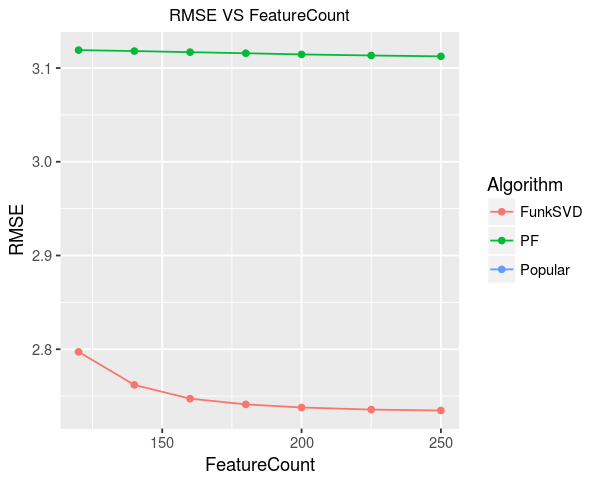

In [6]:
ggplot(stats) +
    aes(x=FeatureCount, y=RMSE, color=Algorithm) +
    geom_line() + geom_point() +
    labs(title = "RMSE VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

Warning message:
“Removed 1 rows containing missing values (geom_point).”

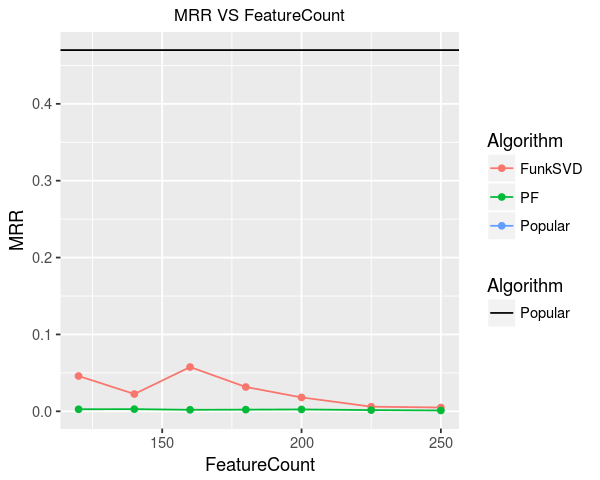

In [7]:
ggplot(stats) +
    aes(x=FeatureCount, y=MRR, color=Algorithm) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=MRR, linetype=Algorithm), data=res_baseline) +
    labs(title = "MRR VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

Warning message:
“Removed 1 rows containing missing values (geom_point).”

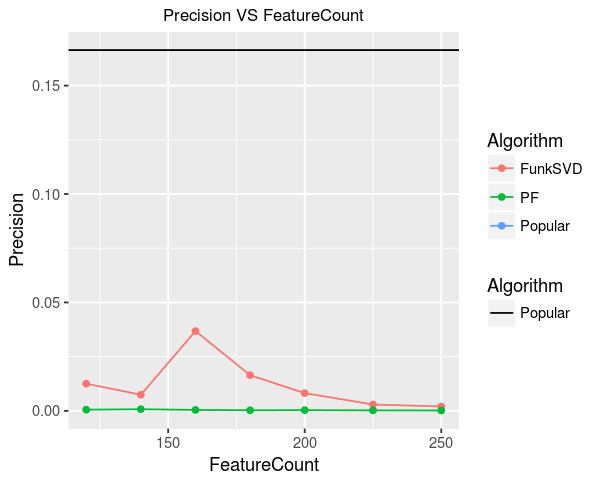

In [8]:
ggplot(stats) +
    aes(x=FeatureCount, y=Precision, color=Algorithm) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=Precision, linetype=Algorithm), data=res_baseline) +
    labs(title = "Precision VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

Warning message:
“Removed 1 rows containing missing values (geom_point).”

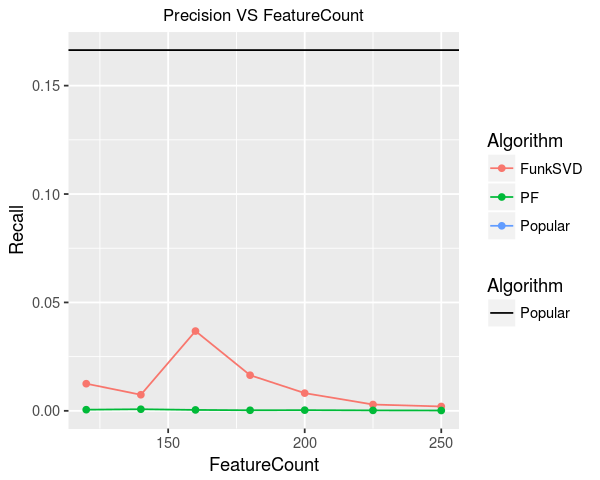

In [9]:
ggplot(stats) +
    aes(x=FeatureCount, y=Recall, color=Algorithm) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=Recall, linetype=Algorithm), data=res_baseline) +
    labs(title = "Precision VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

Warning message:
“Removed 1 rows containing missing values (geom_point).”

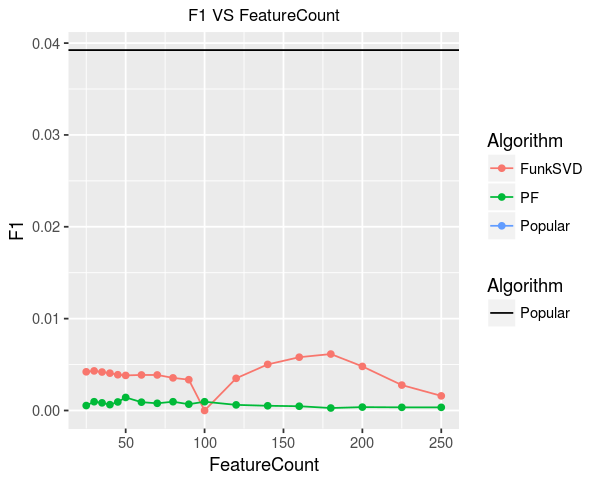

In [14]:
ggplot(stats) +
    aes(x=FeatureCount, y=F1, color=Algorithm) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=F1, linetype=Algorithm), data=res_baseline) +
    labs(title = "F1 VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

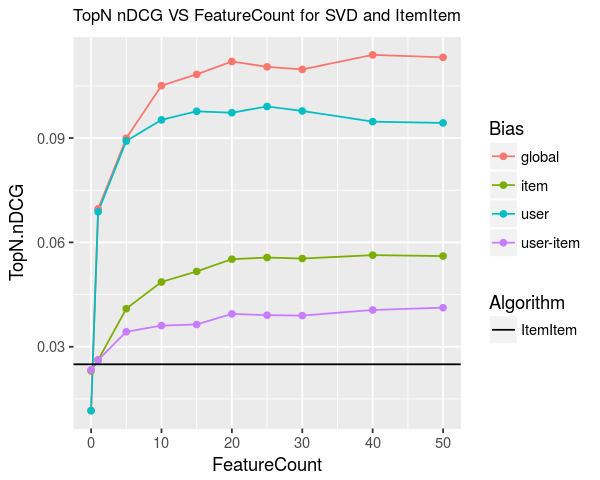

In [10]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=TopN.nDCG, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=TopN.nDCG, linetype=Algorithm), data=res_itemitem) +
    labs(title = "TopN nDCG VS FeatureCount for SVD and ItemItem") +
    theme(plot.title = element_text(hjust=0.5, size=10))

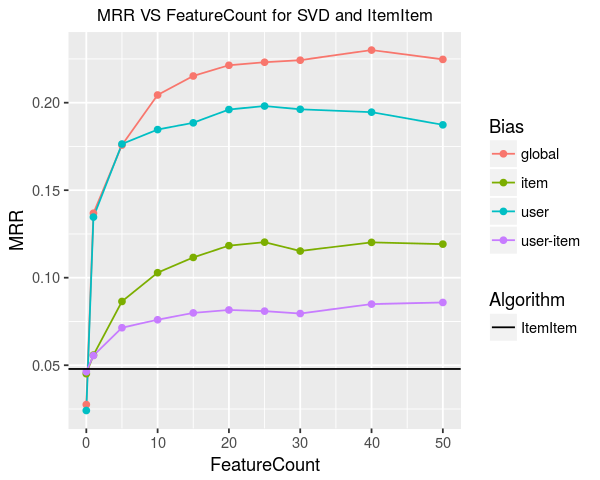

In [11]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=MRR, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=MRR, linetype=Algorithm), data=res_itemitem) +
    labs(title = "MRR VS FeatureCount for SVD and ItemItem") +
    theme(plot.title = element_text(hjust=0.5, size=10))

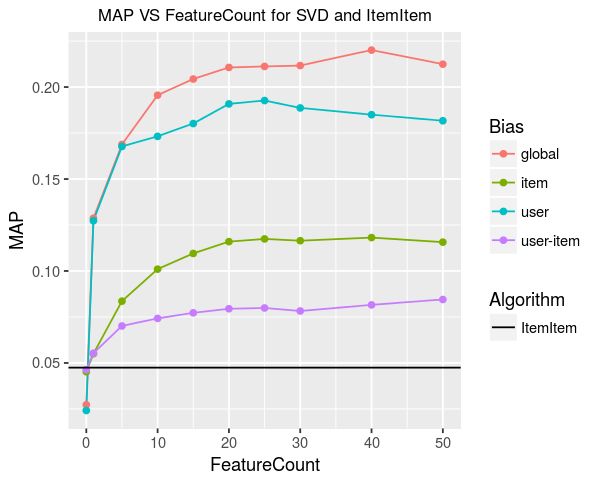

In [12]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=MAP, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=MAP, linetype=Algorithm), data=res_itemitem) +
    labs(title = "MAP VS FeatureCount for SVD and ItemItem") +
    theme(plot.title = element_text(hjust=0.5, size=10))

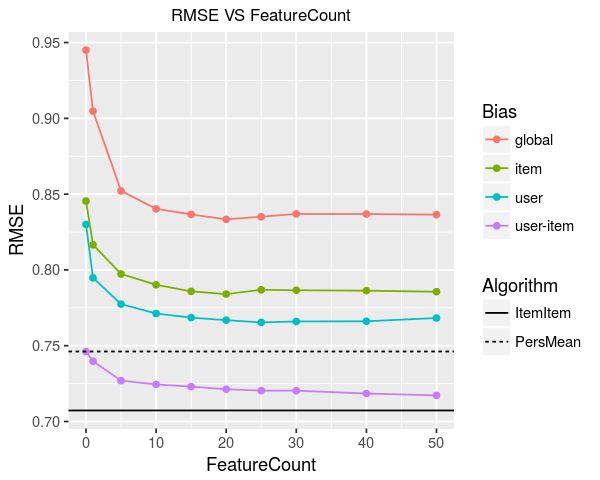

In [13]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=RMSE, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=RMSE, linetype=Algorithm), data=res_baseline) +
    labs(title = "RMSE VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

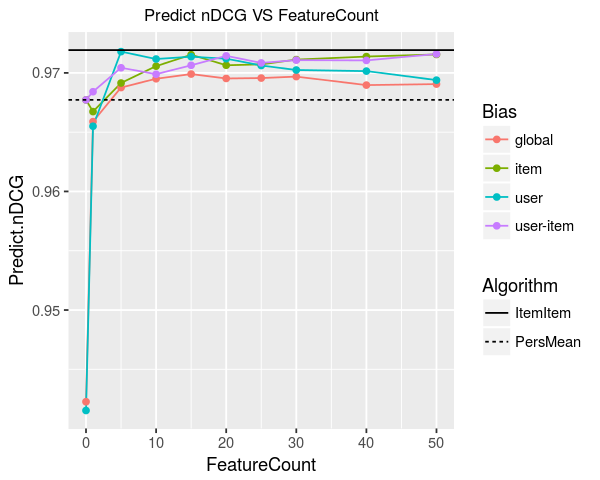

In [14]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=Predict.nDCG, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=Predict.nDCG, linetype=Algorithm), data=res_baseline) +
    labs(title = "Predict nDCG VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

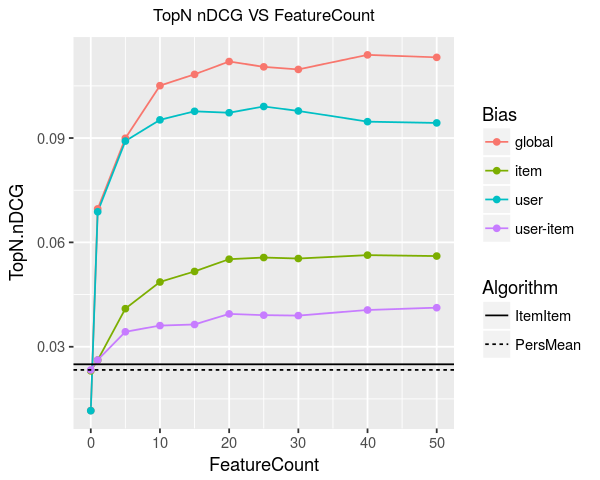

In [15]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=TopN.nDCG, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=TopN.nDCG, linetype=Algorithm), data=res_baseline) +
    labs(title = "TopN nDCG VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

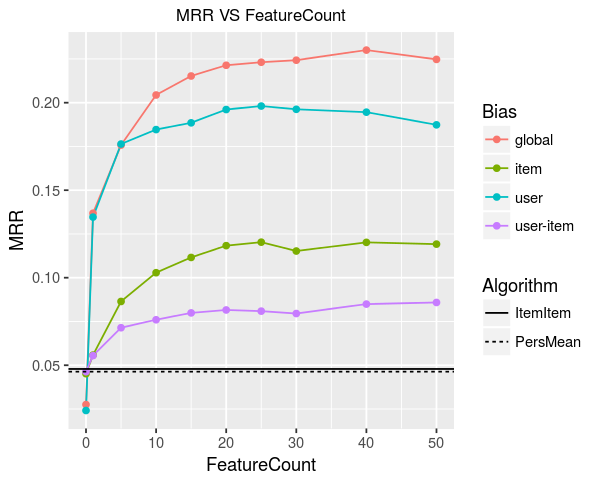

In [16]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=MRR, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=MRR, linetype=Algorithm), data=res_baseline) +
    labs(title = "MRR VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

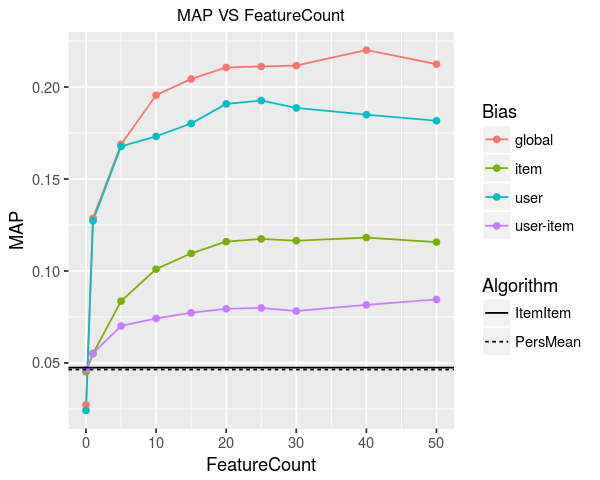

In [17]:
ggplot(res_svd) +
    aes(x=FeatureCount, y=MAP, color=Bias) +
    geom_line() + geom_point() +
    geom_hline(aes(yintercept=MAP, linetype=Algorithm), data=res_baseline) +
    labs(title = "MAP VS FeatureCount") +
    theme(plot.title = element_text(hjust=0.5, size=10))

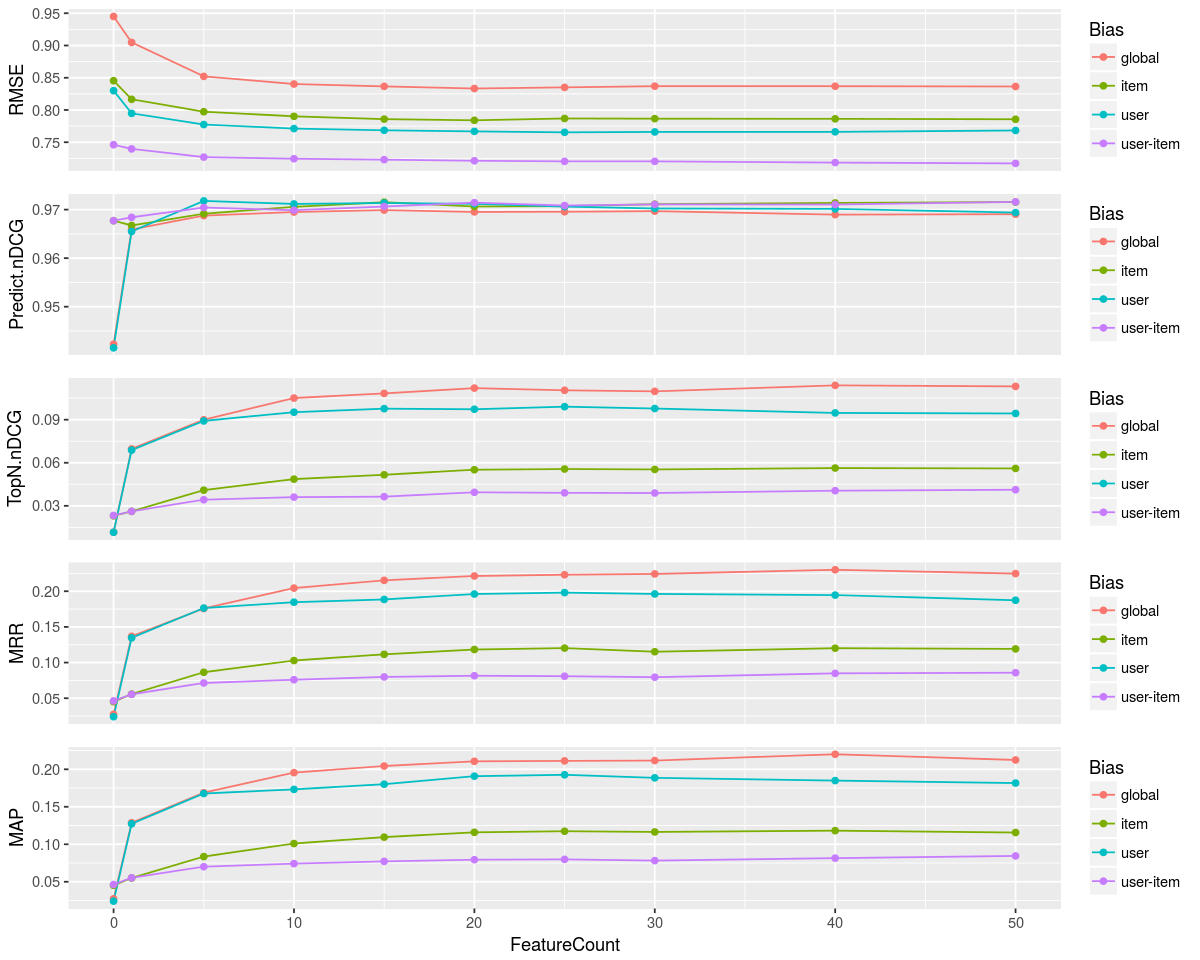

In [18]:
options(repr.plot.width=10, repr.plot.height=8)
plot1=ggplot(res_svd) +
    aes(x=FeatureCount, y=RMSE, color=Bias) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot2=ggplot(res_svd) +
    aes(x=FeatureCount, y=Predict.nDCG, color=Bias) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot3=ggplot(res_svd) +
    aes(x=FeatureCount, y=TopN.nDCG, color=Bias) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot4=ggplot(res_svd) +
    aes(x=FeatureCount, y=MRR, color=Bias) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot5=ggplot(res_svd) +
    aes(x=FeatureCount, y=MAP, color=Bias) +
    geom_line() + geom_point()

grid.newpage()
grid.draw(rbind(ggplotGrob(plot1), ggplotGrob(plot2), ggplotGrob(plot3), ggplotGrob(plot4), ggplotGrob(plot5), size = "last"))

In [21]:
svd_groupbyfeature = res_svd %>% 
    group_by(FeatureCount) %>%
    summarize(N=n(), RMSE=mean(RMSE),
              Predict.nDCG=mean(Predict.nDCG),
              TopN.nDCG=mean(TopN.nDCG),
              MRR=mean(MRR),
              MAP=mean(MAP))

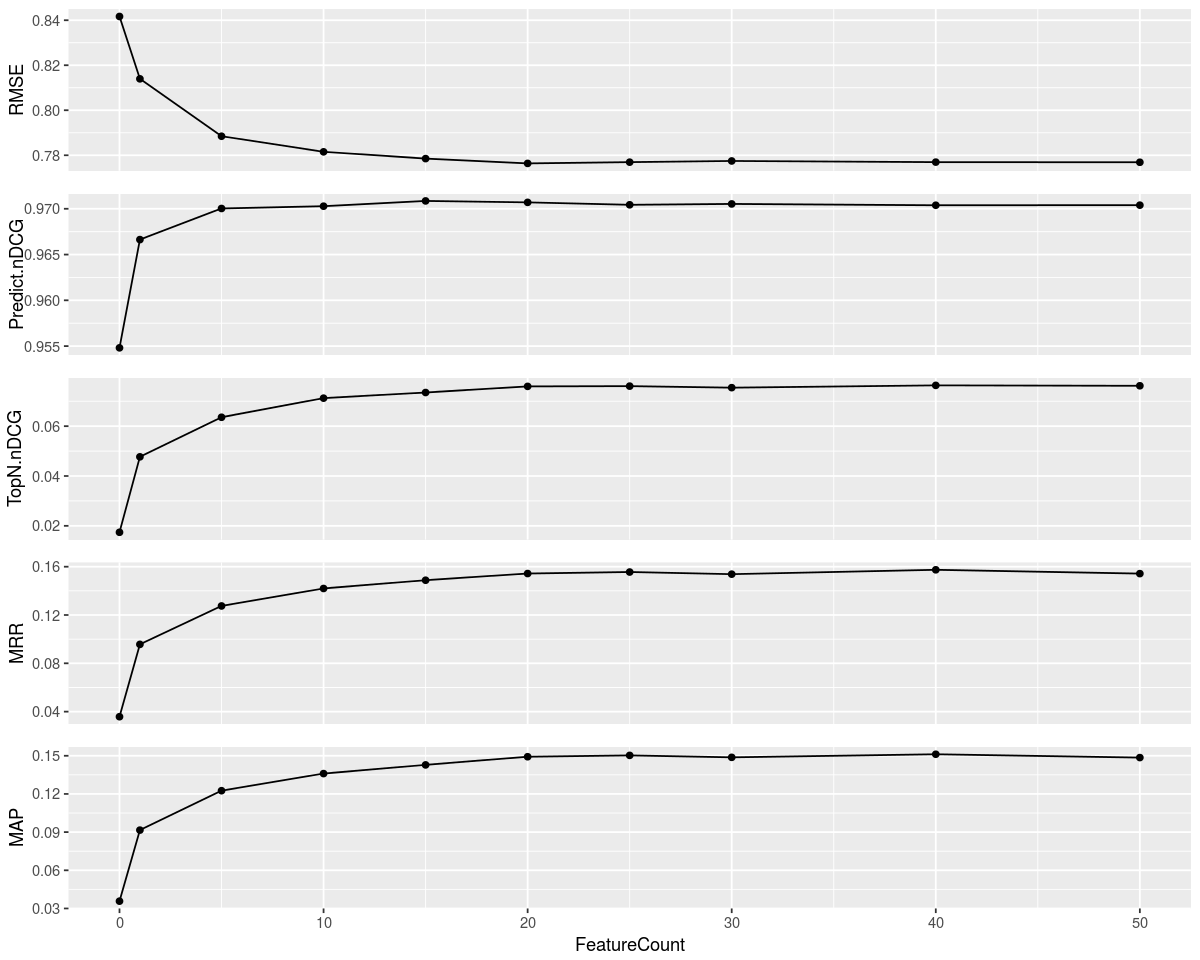

In [24]:
options(repr.plot.width=10, repr.plot.height=8)
plot1=ggplot(svd_groupbyfeature) +
    aes(x=FeatureCount, y=RMSE) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot2=ggplot(svd_groupbyfeature) +
    aes(x=FeatureCount, y=Predict.nDCG) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot3=ggplot(svd_groupbyfeature) +
    aes(x=FeatureCount, y=TopN.nDCG) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot4=ggplot(svd_groupbyfeature) +
    aes(x=FeatureCount, y=MRR) +
    geom_line() + geom_point() +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot5=ggplot(svd_groupbyfeature) +
    aes(x=FeatureCount, y=MAP) +
    geom_line() + geom_point()

grid.newpage()
grid.draw(rbind(ggplotGrob(plot1), ggplotGrob(plot2), ggplotGrob(plot3), ggplotGrob(plot4), ggplotGrob(plot5), size = "last"))